# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `01`
* Students: `Timothée Bornet dit Vorgeat, Yassine Zouaghi, Pol Boudou, Icíar Lloréns Jover`
* Dataset: `IMDb Films and Crew`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import networkx as nx

## Part 1

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [2]:
DATA_PATH = "DataMS1/"

adjacency = np.load(DATA_PATH + 'adjacency.npy')
N = len(adjacency)
L = int(np.count_nonzero(adjacency)/2)

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Your code here.
    if seed is not None: 
        random.seed(seed) 
    
    p_integer = round(1/p)
    LINK_VALUE = random.randint(1, p_integer)
    
    adjacency = np.zeros((n,n), dtype=int)
    
    for i in range (n):
        for j in range (i):
            if random.randint(1, p_integer) == LINK_VALUE:
                adjacency[i,j] = 1
        
    adjacency = adjacency + np.transpose(adjacency) - np.diag(adjacency)
    return adjacency

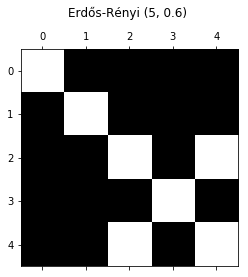

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.figure()
plt.spy(er)
plt.title('Erdős-Rényi (5, 0.6) \n')
plt.show()

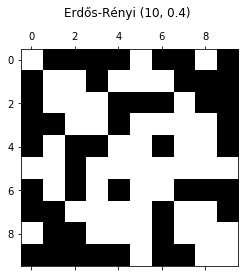

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.figure()
plt.spy(er)
plt.title('Erdős-Rényi (10, 0.4) \n')
plt.show()

### Question 2

Use the function to create a random Erdős-Rényi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

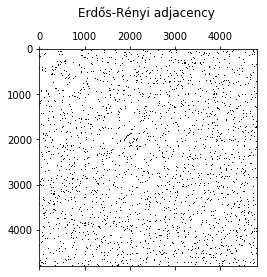

In [6]:
p=2*L/(N*(N-1))

rand_er = erdos_renyi(N, p, 1)
plt.figure()
plt.spy(rand_er)
plt.title('Erdős-Rényi adjacency \n')
plt.show()

**Your answer here.**

In an Erdős-Rényi random network each pair of nodes is connected with probability $p$. As we don't know the value $p$ of our network, we can approximate $p$ according to the number of links $L$ and nodes $N$ we would like to have in the random model. In a network with $N$ nodes in which every edge is included with a probability $p$ independent from any other edge, the expected number of links is $\langle L\rangle =p\frac{N(N-1)}{2}$.  We choose a probability $p=2\frac{L}{N(N-1)}$. With $N=4803$ and $L=476873$, our random model will have a probability $p \approx 0.0414$

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [7]:
def barabasi_albert(n, m, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Your code here.
    
    # Total number of nodes after the end of the graph construction: n
    # Initial number of nodes before the graph construction:         m
    # Nodes that we'll need to add:                                  n-m
    
    # Initialize seed if it is not None
    if seed is not None: 
        random.seed(seed) 
    
    # Start with m initial nodes and chose links arbitrarily
    graph = []
    # Choose links arbitrarily with at least one link per node 
    for i in range(m):
        length = random.randint(1, m)
        edges = [random.randrange(0, m, 1) for _ in range(length)]
        edges = list(set(edges))
        graph.append(edges)
    
    # Start adding the other n-m nodes. The first node is m
    current_node = m 
    
    while current_node < n: 
        # Compute the degree of each node
        degrees = []
        for k in range(len(graph)):
            degrees.append(len(graph[k]))
            
        # Compute the probability of "picking" each node
        tot_degree = sum(degrees)
        probabilities = [x / tot_degree for x in degrees]
            
        # Select m new nodes to attach to the current node
        candidate_nodes = []
        while len(candidate_nodes) < m:
            for node in range(m):
                # Choose nodes according to the probability of their degree
                new_node = np.random.choice(np.arange(0, len(graph)), p=probabilities)
                if new_node not in candidate_nodes:
                    candidate_nodes.append(new_node)
        
        # Attach these new nodes to the current node
        graph.append(candidate_nodes)
        
        # Graph is undirected, so we need to make the edge symmetric
        for element in candidate_nodes:
            graph[element].append(current_node)
        
        # Update current node
        current_node += 1
    
    # Transform the graph into an adjacency matrix
    adjacency = np.zeros([n,n])
    
    for i in range(len(graph)):
        adjacency[i][np.array(graph[i])] = 1
    
    return adjacency

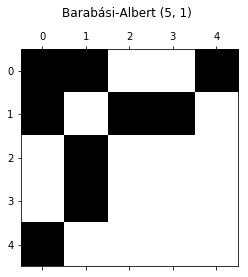

In [8]:
ba = barabasi_albert(5, 1, 9087)
plt.figure()
plt.spy(ba)
plt.title('Barabási-Albert (5, 1) \n')
plt.show()

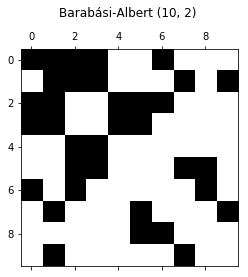

In [9]:
ba = barabasi_albert(10, 2, 8708)
plt.figure()
plt.spy(ba)
plt.title('Barabási-Albert (10, 2) \n')
plt.show()

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

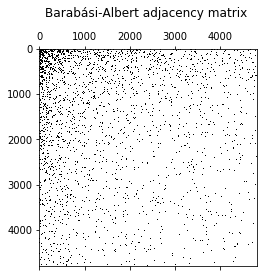

In [10]:
# Your code here.
m = int(round((1/4)*(3*N - np.sqrt(9*N*N - 16*L))))
rand_ba = barabasi_albert(N, m)
plt.figure()
plt.spy(rand_ba)
plt.title('Barabási-Albert adjacency matrix \n')
plt.show()

**Your answer here**

The first m nodes of the Barabási-Albert graph are connected to an arbitrary number of nodes between 1 and m at the beginning and then connected to a certain number of new nodes as the graph is constructed. The following $N-m$ nodes (N being the total number of nodes) are connected to exactly m other nodes in the graph. 

We assume that initially the first m nodes will each be connected to $\frac{m}{2}$ nodes. Subsequently, when more nodes are added, these first m nodes will be connected to an additional $\frac{N-m}{2}$ nodes approximately. 

This means that the total number of edges in the Barabási-Albert graph will be approximately $(N-m)m + m(\frac{m}{2} + \frac{N-m}{2})$. 

This makes a total of $\frac{3Nm}{2} - m^2$ edges. We want this number to be equal to L (the total number of edges in our original graph). By solving the quadratic equation, we set m to be:

$$m = round((\frac{1}{4}(3N - \sqrt{9N^2 - 16L}))$$

These approximations give us a number of edges that is reasonably close to the actual number of edges of our graph.

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [11]:
# Your code here.
edges_ba = int(np.count_nonzero(rand_ba)/2)
edges_er = int(np.count_nonzero(rand_er)/2)
print('Total number of edges in our real graph:                  ', L)
print('Total number of edges in the random Erdős-Rényi graph:    ', edges_er)
print('Total number of edges in the random Barabási-Albert graph:', edges_ba)

print()

Total number of edges in our real graph:                   476873
Total number of edges in the random Erdős-Rényi graph:     480352
Total number of edges in the random Barabási-Albert graph: 516068



### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [12]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # We consider P as the emipirical value (our network) and Q as the model we try to fit (ER or BA here)
    
    kl = sum(p*(np.log(p/q)))
    
    return kl

In [13]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.091516221849435753

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

#### Approach

In order to compare the different degree distribution using the KL divergence we first have to engineer our way through the following problem.
Indeed, the KL divergence algorithm needs to compare two arrays of same size (and we cannot have null values).

Our solution to compare such different ditributions is to create bins that cover the majority of null values but also some non-zero ones. We add to those bins some other, much precise ones covering the interval where there are values in both distribution.

In [14]:
binary_adjacency = np.where(adjacency > adjacency[np.nonzero(adjacency)].min(), 1, 0)
degree_imdb = binary_adjacency.sum(1)

In [15]:
bins_array_er = [0]

# The interval of degree values where both distributions have non-zeros is the following: [160, 240]
bins_array_er.extend(np.linspace(160,240,8).tolist())
bins_array_er.extend([300])

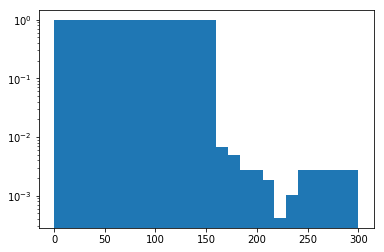

In [26]:
weights_imdb = np.ones_like(degree_imdb) / float(N)
degree_imdb_frequency_er, degree_imdb_bins_er, _  = plt.hist(degree_imdb, weights=weights_imdb, bins=bins_array_er,log=True)

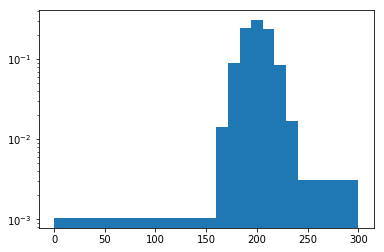

In [106]:
degree_er = rand_er.sum(1)
weights_er = np.ones_like(degree_er) / float(N)
degree_er_frequency, degree_er_bins, _ = plt.hist(degree_er, weights=weights_er, bins=bins_array_er,log=True)

In [107]:
print('The KL divergence from the Erdős-Rényi model to our network is '+ str(kl_divergence(degree_imdb_frequency_er,degree_er_frequency)))

The KL divergence from the Erdős-Rényi model to our network is 6.62691312017


In [20]:
bins_array_ba = [0]
bins_array_ba.extend(np.linspace(70,250,24).tolist())
bins_array_ba.extend([1050])

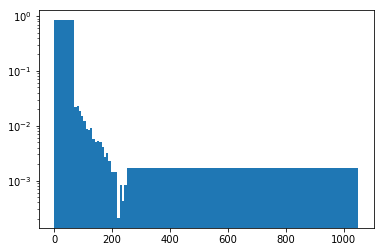

In [108]:
degree_imdb_frequency_ba, degree_imdb_bins_ba, _ = plt.hist(degree_imdb, weights=weights_imdb, bins=bins_array_ba,log=True);

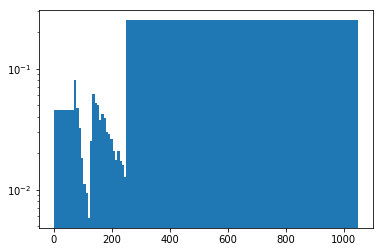

In [109]:
degree_ba = rand_ba.sum(1)
weights_ba = np.ones_like(degree_ba) / float(N)
degree_ba_frequency, degree_ba_bins, _ = plt.hist(degree_ba, weights=weights_ba, bins=bins_array_ba,log=True);

In [ ]:
print('The KL divergence from the Barabási-Albert model to our network is '+str(kl_divergence(degree_imdb_frequency_ba,degree_ba_frequency)))

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

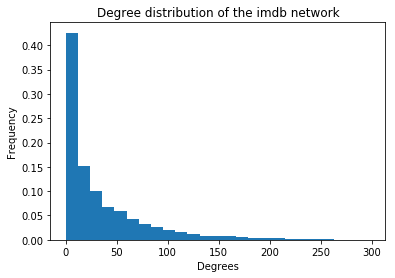

In [23]:
plt.hist(degree_imdb, weights=weights_imdb, bins=25);
plt.title('Degree distribution of the imdb network')
plt.xlabel('Degrees');
plt.ylabel('Frequency');

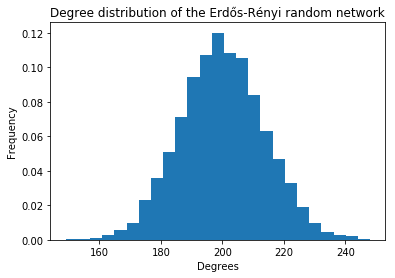

In [24]:
plt.hist(degree_er, weights=weights_er, bins=25);
plt.title('Degree distribution of the Erdős-Rényi random network')
plt.xlabel('Degrees');
plt.ylabel('Frequency');

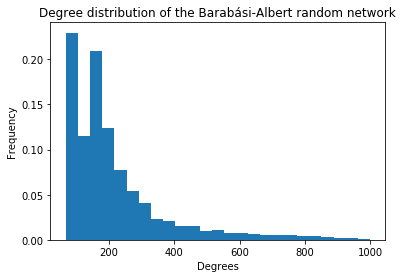

In [25]:
plt.hist(degree_ba, weights=weights_ba, bins=25);
plt.title('Degree distribution of the Barabási-Albert random network')
plt.xlabel('Degrees');
plt.ylabel('Frequency');

**Answer:**

As we can see, the BA model fits much better our network than the ER one. Indeed, the Barabási-Albert's degree distribution seems to follow also a Power Law (typical of scale-free networks of real networks), albeit with a less rapid decrease than our network. However, the Erdős-Rényi seems to follow a Binomial distribution, typical of traditional random networks.

The KL divergence between the ER model and ours is approximatly 6.63, which is almost 3 times as great as the KL divergence between the BA model and our network (2.31). We can hence conclude that the resulting degree distributions are coherent with the KL divergence values. 

If we take a closer look at the distributions, we also see that the BA model's distribution is much wider and has no nodes with few neighbors explaining the relatively high KL value.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Answer:**

Let us use an example to illustrate our premise. If we imagine two different graphs, one with 3 nodes and one with 1000 nodes, both graphs having all its nodes placed in a circle. This means that all nodes are connected to 2 other nodes exactly. The two graphs are different graphs but they have the same degree distribution since the degree distribution is normalized.

Now let's assume a graph with at least one node with only one edge and one with two edges.
Now if you replace the two connection node by an edge and place it in between the solely connected node and its only neighbour the result will be a different graph with the same number of nodes and degree distribution.

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

By looking at the lecture notes and the questions above we can try to use the Watts-Strogatz model. In fact, as the IMDB network can be considered a social network, we expect it to have low average shortest path.On the other hand, the Watts-Strogatz graph is a small world model which has as a property small average shortest path. Additionally, we expect for both models to have a giant component and possibly comparable clustering coefficients.

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

The netwrok starts with n0 number of nodes connected with m closest neighbors. Then the links edges are rewired with a probability p leading to short path lengths while having high clustering.

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [91]:
# Your code here.
import networkx as nx

# Here we use netwrokx to create a Watts-Strogatz graph with the same number of nodes as the IMDB
# graph and comparable number of edges
G_wt_gr = nx.watts_strogatz_graph(N,m,0.4)

# We extract the adjacency matrix for later use and save ut as a numpy array
G_wt = nx.adjacency_matrix(G_wt_gr)
G_wt = G_wt.toarray()

edges_G_wt = int(np.count_nonzero(G_wt)/2)

degree_G_wt = G_wt.sum(1)

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [99]:
# First we find the biggest subgraph from the Watts-Strogatz graph
giant_cmp_wt_gr = max(nx.connected_component_subgraphs(G_wt_gr),key=len)

# Transform it into a numpy array
giant_cmp_wt = nx.to_numpy_matrix(giant_cmp_wt_gr)

# Compute the number of edges
edges_gc_wt = int(np.count_nonzero(giant_cmp_wt)/2)

# Computes the average clustering coeffcient of the Watts-Strogatz graph
avg_cc_wt = nx.average_clustering(giant_cmp_wt_gr)


In [100]:
nx.is_connected(giant_cmp_wt_gr)

True

In [113]:
print('The biggest component of the Watts-Strogatz graph is composed of: ', len(giant_cmp_wt), 'nodes')
print('The whole Watts-Strogatz graph is composed of: ', len(G_wt), 'nodes')

The biggest component of the Watts-Strogatz graph is composed of:  4803 nodes
The whole Watts-Strogatz graph is composed of:  4803 nodes


In [96]:
# Create a graph from the adjacency matrix of the IMDB dataset
adj_gr = nx.from_numpy_matrix(adjacency)

# Find its biggest component
giant_cmp_gr = max(nx.connected_component_subgraphs(adj_gr),key=len)
giant_cmp = nx.to_numpy_matrix(giant_cmp_gr)

# Computes number of edges of the giant component
edges_gc = int(np.count_nonzero(giant_cmp)/2)

# Computes the average clustering coeffcient of the IMDB graph
avg_cc = nx.average_clustering(giant_cmp_gr)

In [98]:
print('Number of nodes in forming the giant component of the IMDB dataset : ', len(giant_cmp_gr))
print('Number of nodes in the IMDB network: ', len(adj_gr))

Number of nodes in forming the giant component of the IMDB dataset :  4713
Number of nodes in the IMDB network:  4803


In [92]:
avg_dist_wt = nx.average_shortest_path_length(G_wt_gr)

In [93]:
avg_dist_imdb = nx.average_shortest_path_length(giant_cmp_gr)

In [102]:
print("The average shortest path of the Watts-Strogatz graph's giant component: ", avg_dist_wt)
print("The average shortest path of the IMDB graph's giant component: ", avg_dist_imdb)

The average shortest path of the Watts-Strogatz graph's giant component:  2.5247787396517327
The average shortest path of the IMDB graph's giant component:  2.182449602065162


In [97]:
print("The average Clustering Coefficient of the Watts-Strogatz graph's giant component: ", avg_cc_ba)
print("The average Clustering Coefficient of the IMDB graph's giant component: ", avg_cc)


The average Clustering Coefficient of the Watts-Strogatz graph's giant component:  0.13939592037788176
The average Clustering Coefficient of the IMDB graph's giant component:  0.23473716719813534


In [103]:
# Computes all the local clustering coefficients for both the IMDB and the Watts-Strogatz graph
cc_dist = nx.clustering(giant_cmp_gr)
cc_dist_ba = nx.clustering(giant_cmp_wt_gr)

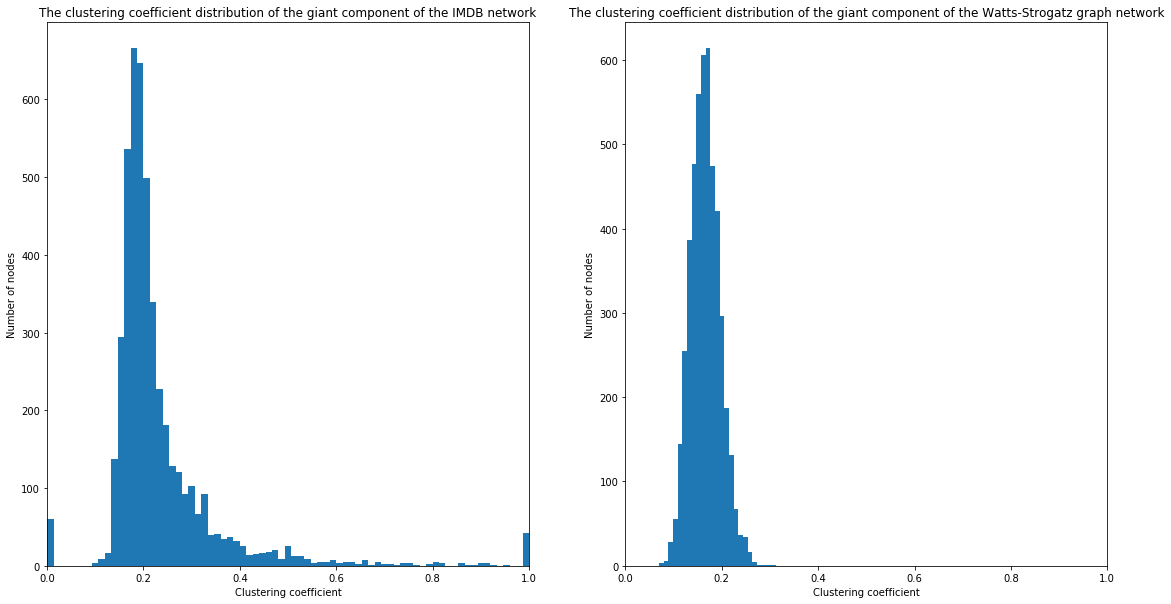

In [104]:
plt.figure(figsize=(19,10))
plt.subplot(121)
plt.hist(cc_dist.values(), bins=75);
plt.title("The clustering coefficient distribution of the giant component of the IMDB network")
plt.xlabel('Clustering coefficient')
plt.ylabel('Number of nodes')
plt.xlim(0,1)

plt.subplot(122)
plt.hist(cc_dist_ba.values(), bins=25);
plt.title("The clustering coefficient distribution of the giant component of the Watts-Strogatz graph network")
plt.xlabel('Clustering coefficient')
plt.ylabel('Number of nodes')
plt.xlim(0,1)

plt.show()

Are the results what you expected? Explain.

**Your answer here.**

First we see very comparable (and low) average shortest paths, this was expected as social networks and small world models tend to share this property. The clustering coefficients aren't that far from each other and are relatively high, the distribution of the local coefficients seems to be also similar but the Watts-Strogatz doesn't seem the capture entirely how the nodes cluster together in our dataset as the average coefficients difference is still non negligeable. Finally, a giant component accounts for most of the nodes in both graphs. Despite all these properties, a key element is missing, the degree distribution. As we see in he figure below, the degree distribution of the Watts-Strogatz model isn't remotely close to a power law and so very far from a scale-free model. This indicate that a Barabási-Albert model may be more suited for our network. 

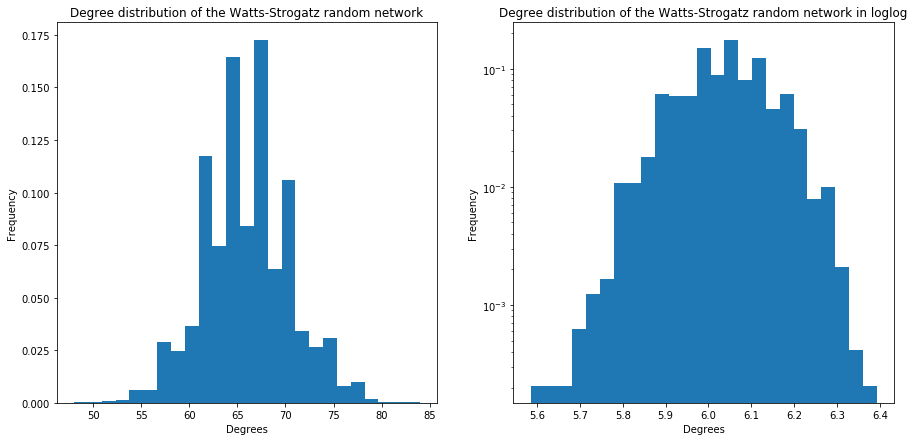

In [110]:
# Your code here.
plt.figure(figsize=(15,7))
plt.subplot(121)
weights_G_wt = np.ones_like(degree_G_wt) / float(N)
plt.hist(degree_G_wt, weights=weights_G_wt, bins=25);
plt.title('Degree distribution of the Watts-Strogatz random network')
plt.xlabel('Degrees');
plt.ylabel('Frequency');

plt.subplot(122)
weights_G_wt = np.ones_like(degree_G_wt) / float(N)
plt.hist(np.log2(degree_G_wt), weights=weights_G_wt, bins=25, log=True);
plt.title('Degree distribution of the Watts-Strogatz random network in loglog')
plt.xlabel('Degrees');
plt.ylabel('Frequency');

plt.show()